In [1]:
import pandas as pd

# Load the new CSV file into a DataFrame
file_path = "newWeather.csv"
df = pd.read_csv(file_path)

# Display the first few rows to verify the data
print(df.head())

  Month_Year     PS    T2M   RH2M    WD2M  WS2M  PRECTOTCORR
0   2003 Jan  99.42  26.12  64.50  348.12  1.48          0.0
1   2003 Feb  99.25  28.18  61.75  303.25  1.86          0.0
2   2003 Mar  99.16  29.47  60.81  292.50  1.95          0.0
3   2003 Apr  99.02  29.82  66.88  286.19  1.84          0.0
4   2003 May  98.98  29.49  70.25  296.38  2.47          0.0


In [2]:
# Remove rows with missing values
df.dropna(inplace=True)

# Optionally, you can remove outliers or handle them as needed
# For demonstration, let's remove rows where any column has a value that is an extreme outlier

# Define a function to detect outliers using Z-score
from scipy import stats
import numpy as np

def remove_outliers(df, z_thresh=3):
    return df[(np.abs(stats.zscore(df.select_dtypes(include=[np.number]))) < z_thresh).all(axis=1)]

# Remove outliers
df = remove_outliers(df)

# Display the DataFrame after cleaning
print(df.head())


  Month_Year     PS    T2M   RH2M    WD2M  WS2M  PRECTOTCORR
0   2003 Jan  99.42  26.12  64.50  348.12  1.48          0.0
1   2003 Feb  99.25  28.18  61.75  303.25  1.86          0.0
2   2003 Mar  99.16  29.47  60.81  292.50  1.95          0.0
3   2003 Apr  99.02  29.82  66.88  286.19  1.84          0.0
4   2003 May  98.98  29.49  70.25  296.38  2.47          0.0


In [3]:
from scipy import stats
import numpy as np

def remove_outliers(df, z_thresh=3):
    return df[(np.abs(stats.zscore(df.select_dtypes(include=[np.number]))) < z_thresh).all(axis=1)]

# Remove outliers
df_clean = remove_outliers(df)

# Display the DataFrame after cleaning
print(df_clean.head())
print("Original shape:", df.shape)
print("Shape after removing outliers:", df_clean.shape)


  Month_Year     PS    T2M   RH2M    WD2M  WS2M  PRECTOTCORR
0   2003 Jan  99.42  26.12  64.50  348.12  1.48          0.0
1   2003 Feb  99.25  28.18  61.75  303.25  1.86          0.0
2   2003 Mar  99.16  29.47  60.81  292.50  1.95          0.0
3   2003 Apr  99.02  29.82  66.88  286.19  1.84          0.0
4   2003 May  98.98  29.49  70.25  296.38  2.47          0.0
Original shape: (237, 7)
Shape after removing outliers: (235, 7)


In [4]:
df

,Month_Year,PS,T2M,RH2M,WD2M,WS2M,PRECTOTCORR
0,2003 Jan,99.42,26.12,64.50,348.12,1.48,0.00
1,2003 Feb,99.25,28.18,61.75,303.25,1.86,0.00
2,2003 Mar,99.16,29.47,60.81,292.50,1.95,0.00
3,2003 Apr,99.02,29.82,66.88,286.19,1.84,0.00
4,2003 May,98.98,29.49,70.25,296.38,2.47,0.00
...,...,...,...,...,...,...,...
235,2022 Aug,98.88,25.35,90.62,284.12,2.64,32.15
236,2022 Sep,99.02,25.39,88.38,274.94,2.06,12.72
237,2022 Oct,99.12,25.72,83.50,278.69,1.45,4.31
238,2022 Nov,99.20,26.10,76.31,195.88,1.05,1.73


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
data=df_clean

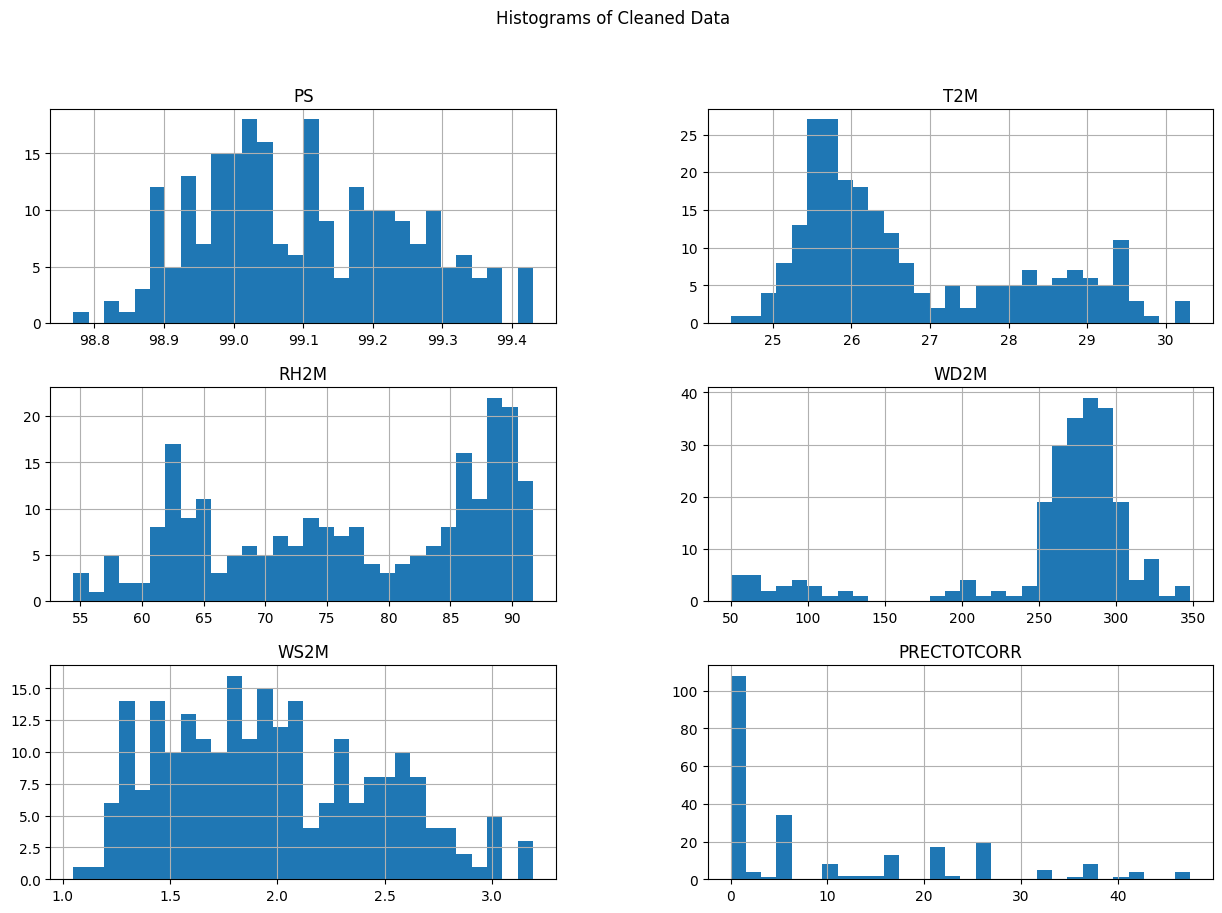

In [7]:
import matplotlib.pyplot as plt

# Plot histograms for each numeric column
df_clean.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Cleaned Data")
plt.show()


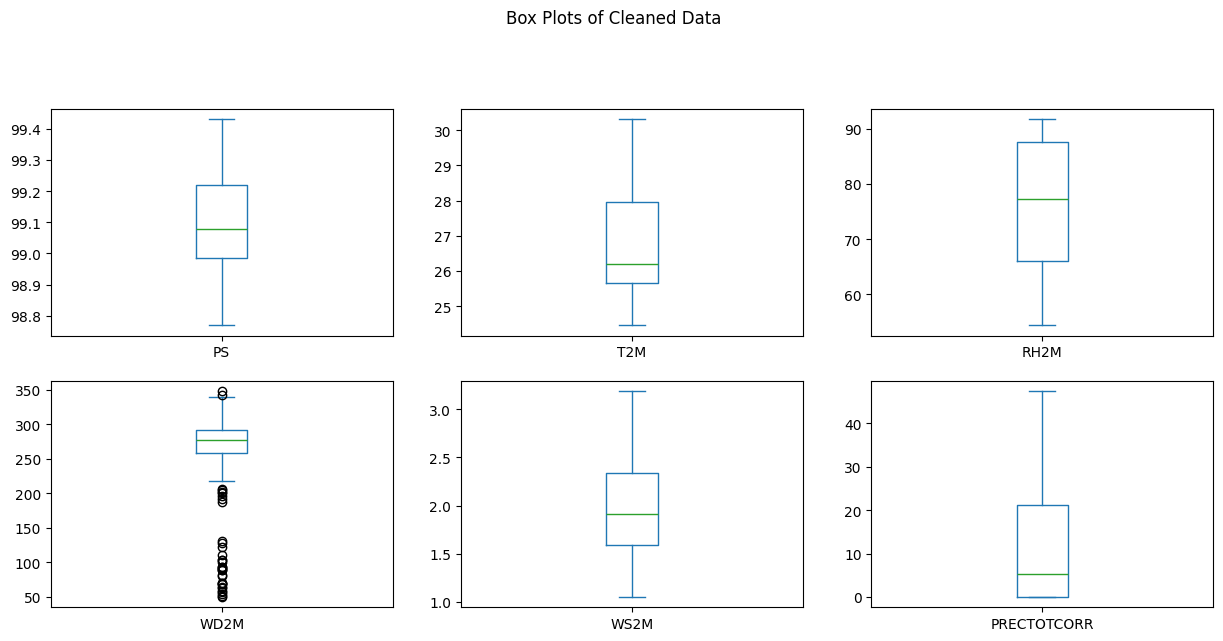

In [8]:
# Plot box plots for each numeric column
df_clean.plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 10), sharex=False, sharey=False)
plt.suptitle("Box Plots of Cleaned Data")
plt.show()


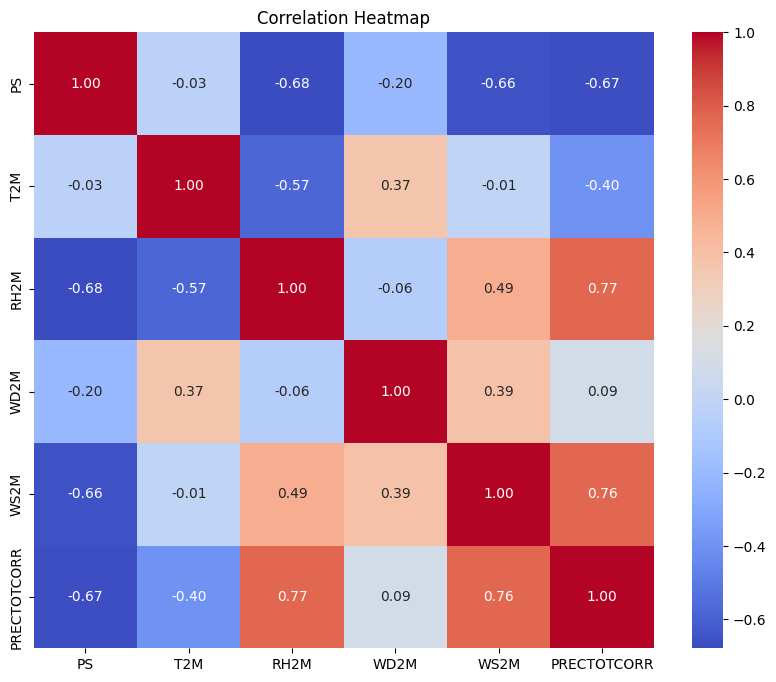

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns
numeric_df = df_clean.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


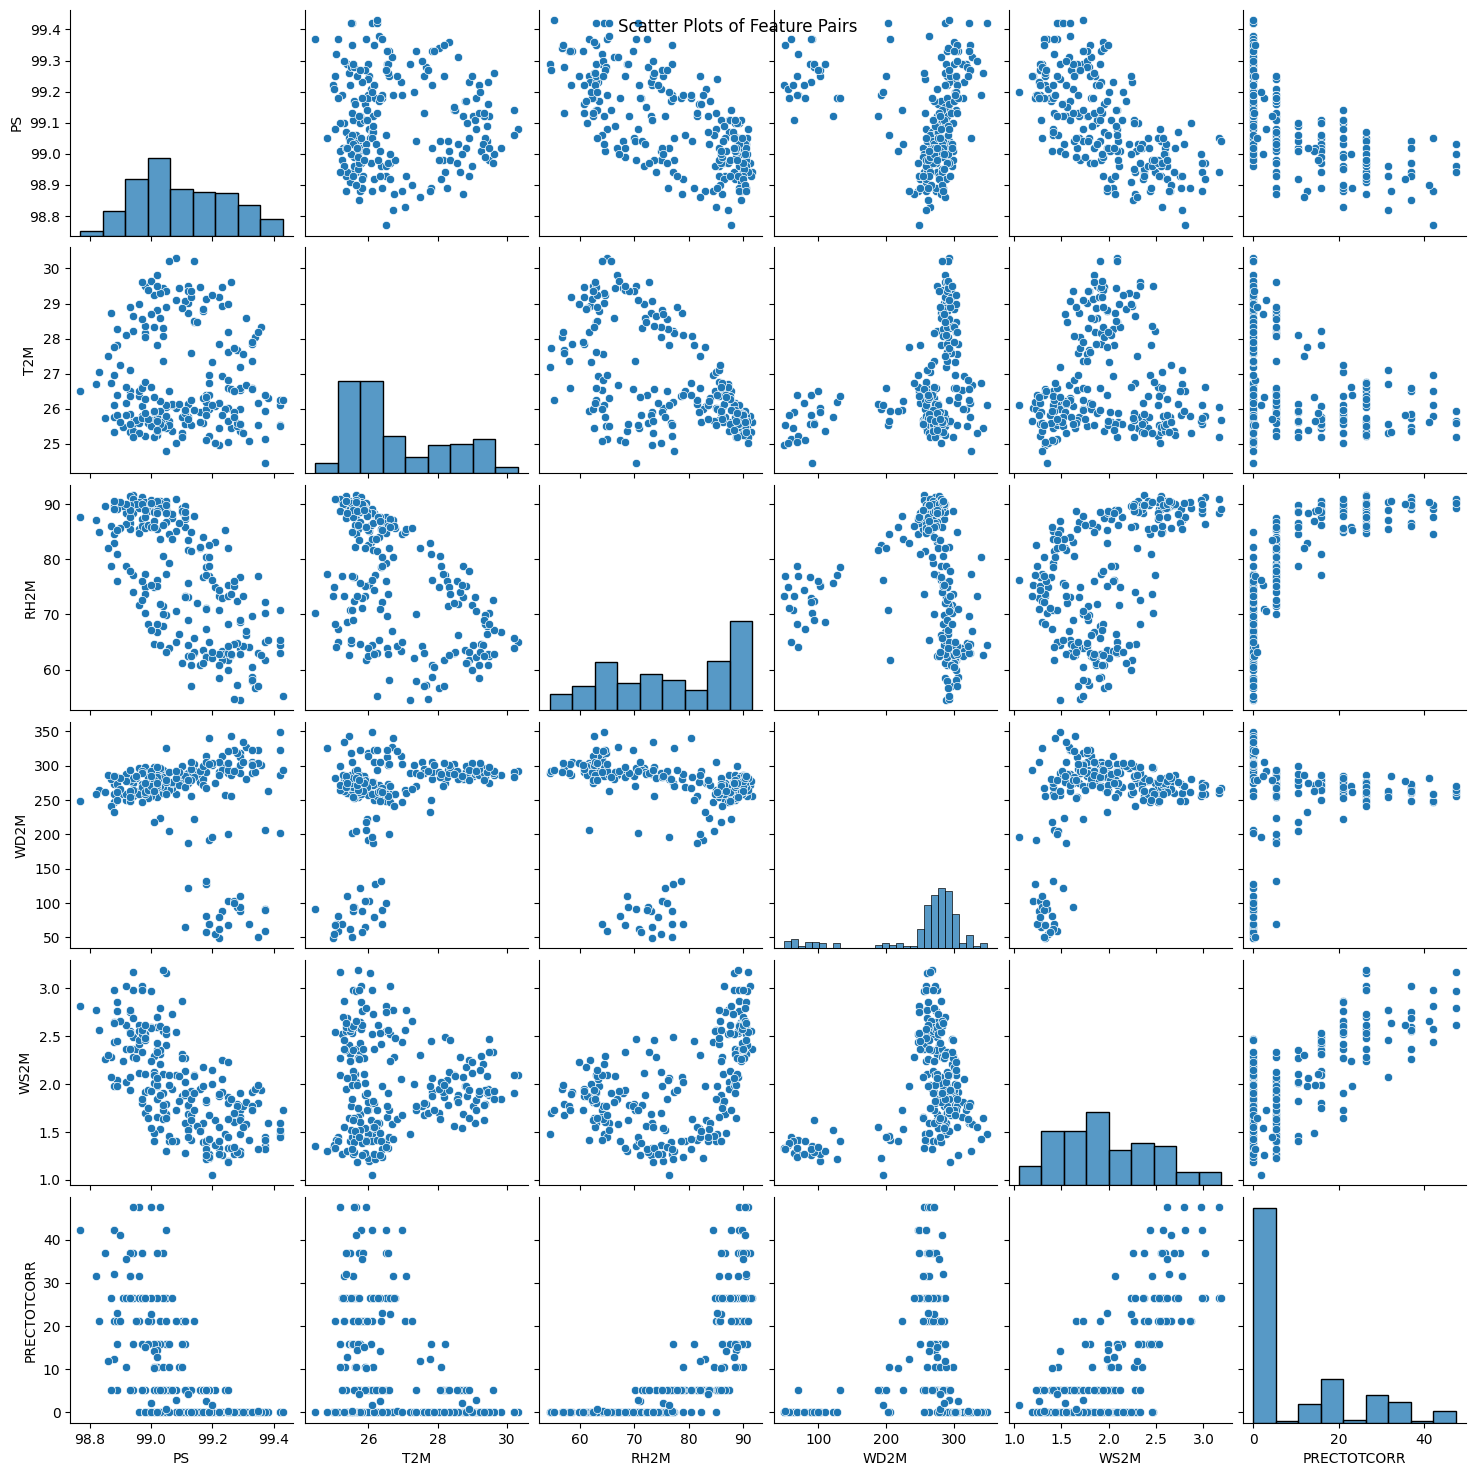

In [10]:
# Plot scatter plots for pairs of features
sns.pairplot(df_clean)
plt.suptitle("Scatter Plots of Feature Pairs")
plt.show()


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
data=df_clean

In [13]:
X=data[data.columns[1:6]]
y=data['PRECTOTCORR']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

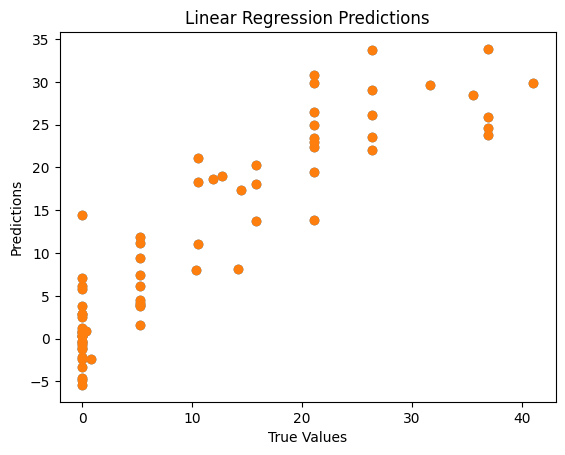

In [36]:
predictions=model.predict(X_test)
plt.scatter(y_test,predictions)
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Linear Regression Predictions")
plt.show()

In [15]:
model.intercept_

1848.876618013475

In [16]:
model.coef_

array([-1.83204472e+01, -2.53700544e+00,  2.33048919e-01, -8.55892878e-03,
        1.47651014e+01])

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
X_train_poly=poly_reg.fit_transform(X_train)
X_test_poly=poly_reg.fit_transform(X_test)
model2=LinearRegression()
model2.fit(X_train_poly,y_train)

LinearRegression()

In [18]:
predictions2=model2.predict(X_test_poly)

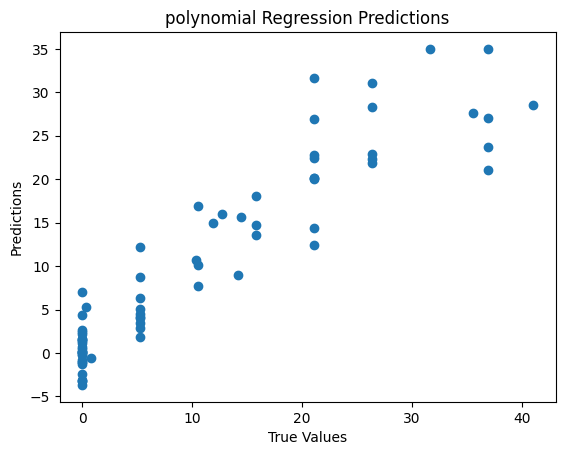

In [35]:
plt.scatter(y_test,predictions2)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("polynomial Regression Predictions")
plt.show()

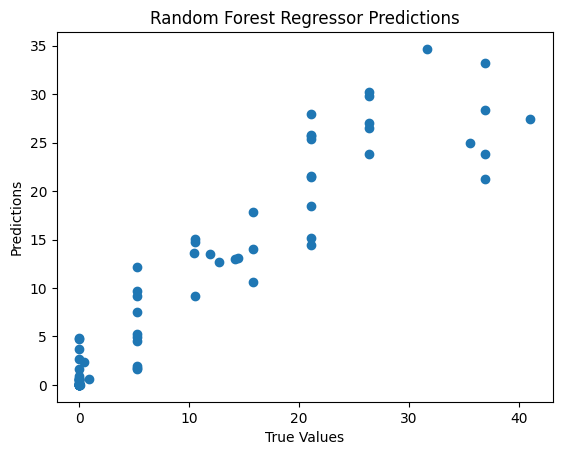

In [20]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are already defined

# Train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions with Random Forest
rf_test_predictions = rf_model.predict(X_test)

# Plot Random Forest predictions
plt.scatter(y_test, rf_test_predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Random Forest Regressor Predictions")
plt.show()


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define a function to evaluate and print metrics
def evaluate_model(model, X_train, X_test, y_train, y_test):
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    print("Model Performance on Training Data:")
    print("MAE:", mean_absolute_error(y_train, train_predictions))
    print("MSE:", mean_squared_error(y_train, train_predictions))
    print("R-squared:", r2_score(y_train, train_predictions))
    
    print("\nModel Performance on Test Data:")
    print("MAE:", mean_absolute_error(y_test, test_predictions))
    print("MSE:", mean_squared_error(y_test, test_predictions))
    print("R-squared:", r2_score(y_test, test_predictions))

# Evaluate Linear Regression model
print("Linear Regression Model:")
evaluate_model(model, X_train, X_test, y_train, y_test)

# Evaluate Polynomial Regression model
print("\nPolynomial Regression Model:")
evaluate_model(model2, X_train_poly, X_test_poly, y_train, y_test)

# Evaluate Random Forest model
print("\nRandom Forest Model:")
evaluate_model(rf_model, X_train, X_test, y_train, y_test)


Linear Regression Model:
Model Performance on Training Data:
MAE: 4.275201389138129
MSE: 33.296833215543145
R-squared: 0.8095122492083414

Model Performance on Test Data:
MAE: 3.945534363455783
MSE: 27.362019122092143
R-squared: 0.8170705455026321

Polynomial Regression Model:
Model Performance on Training Data:
MAE: 2.9176648347294125
MSE: 20.201764742357607
R-squared: 0.884427786183655

Model Performance on Test Data:
MAE: 3.180247389373081
MSE: 20.76597235189405
R-squared: 0.8611685790624889

Random Forest Model:
Model Performance on Training Data:
MAE: 1.0766908536585338
MSE: 3.955930659939012
R-squared: 0.977368528447691

Model Performance on Test Data:
MAE: 2.757023943661971
MSE: 18.75071369112677
R-squared: 0.8746416406022934


Random Forest Regressor Performance on Training Data:
MAE: 1.0766908536585338
MSE: 3.955930659939012
R-squared: 0.977368528447691

Random Forest Regressor Performance on Test Data:
MAE: 2.757023943661971
MSE: 18.75071369112677
R-squared: 0.8746416406022934


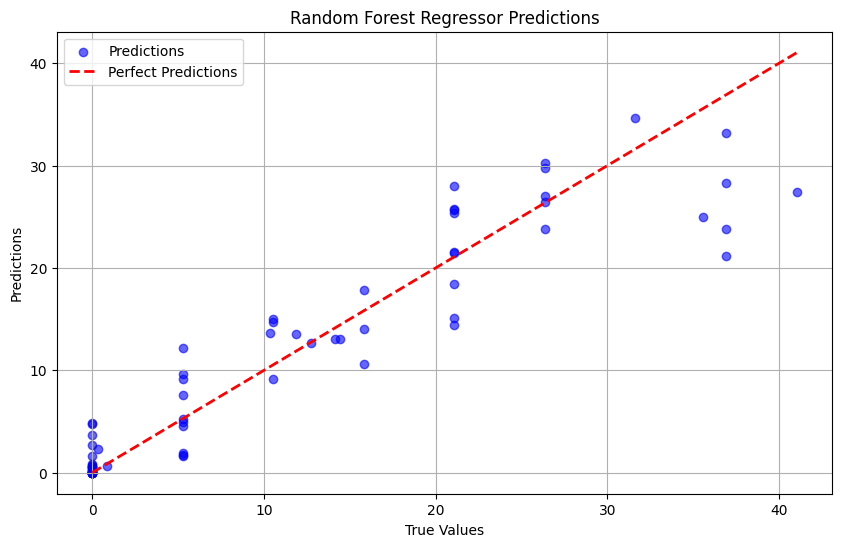

In [22]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are already defined

# Train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions with Random Forest
rf_train_predictions = rf_model.predict(X_train)
rf_test_predictions = rf_model.predict(X_test)

# Evaluate Random Forest model
print("Random Forest Regressor Performance on Training Data:")
print("MAE:", mean_absolute_error(y_train, rf_train_predictions))
print("MSE:", mean_squared_error(y_train, rf_train_predictions))
print("R-squared:", r2_score(y_train, rf_train_predictions))

print("\nRandom Forest Regressor Performance on Test Data:")
print("MAE:", mean_absolute_error(y_test, rf_test_predictions))
print("MSE:", mean_squared_error(y_test, rf_test_predictions))
print("R-squared:", r2_score(y_test, rf_test_predictions))

# Plot Random Forest predictions
plt.figure(figsize=(10, 6))

# Scatter plot for test data
plt.scatter(y_test, rf_test_predictions, color='blue', alpha=0.6, label='Predictions')

# Diagonal line indicating perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Predictions')

plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Random Forest Regressor Predictions")
plt.legend()
plt.grid(True)
plt.show()


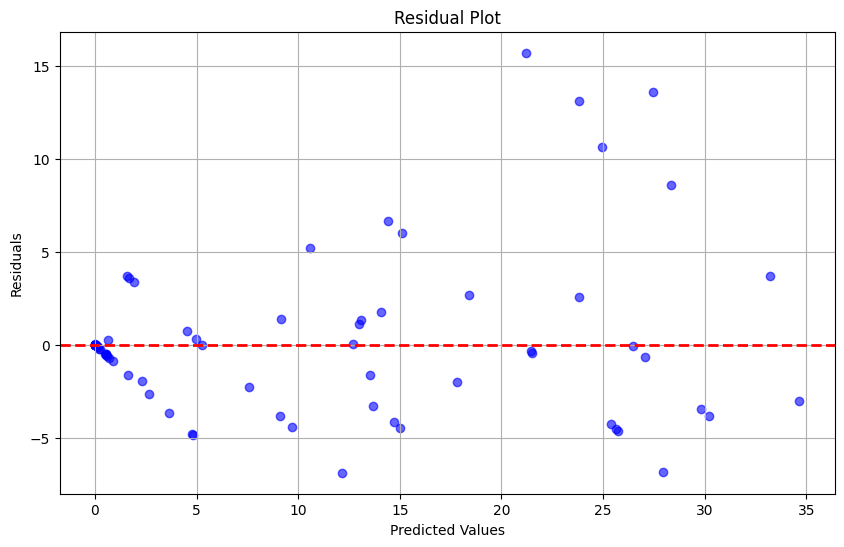

In [23]:
# Calculate residuals
test_residuals = y_test - rf_test_predictions

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(rf_test_predictions, test_residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


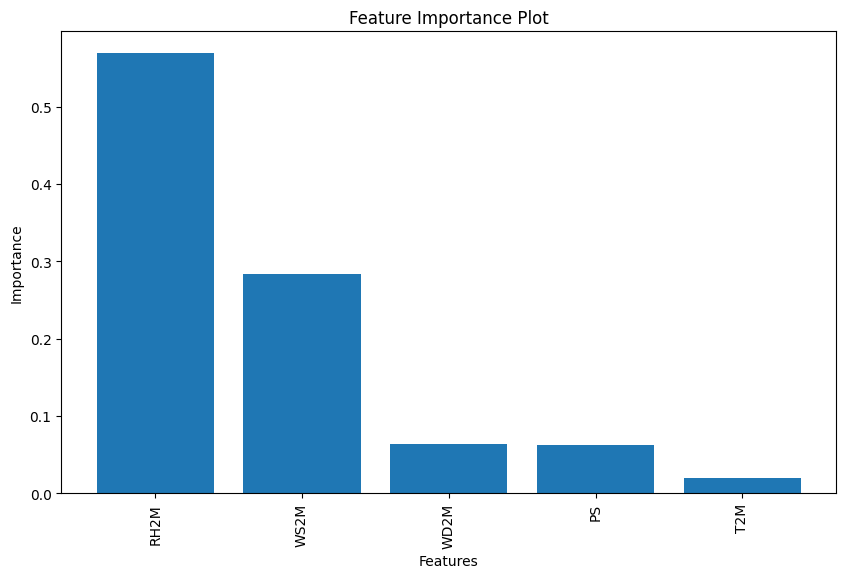

In [24]:
# Get feature importances
feature_importances = rf_model.feature_importances_
features = X.columns

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.show()


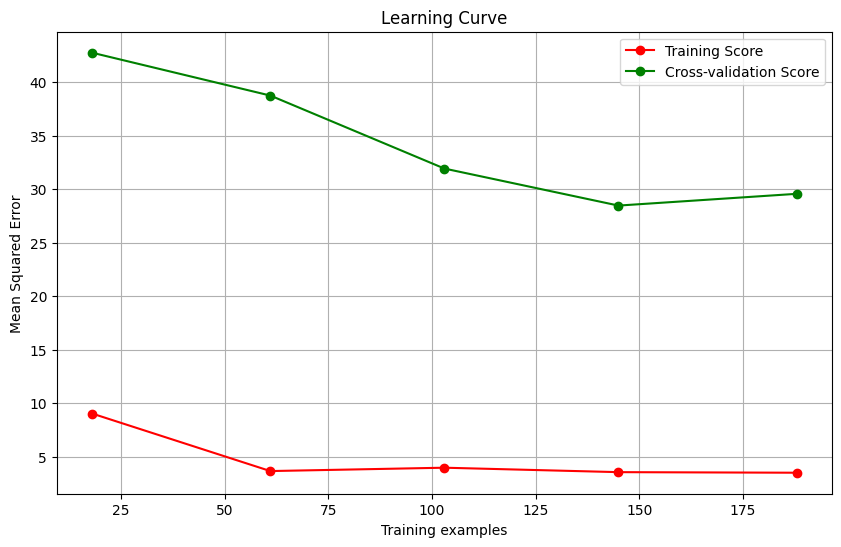

['random_forest_regressor_model.pkl']

In [30]:
from sklearn.model_selection import learning_curve

# Learning curve function
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation Score')
    plt.xlabel('Training examples')
    plt.ylabel('Mean Squared Error')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Plot learning curve
plot_learning_curve(rf_model, X, y)
# Save the model
joblib.dump(rf_model, 'random_forest_regressor_model.pkl')

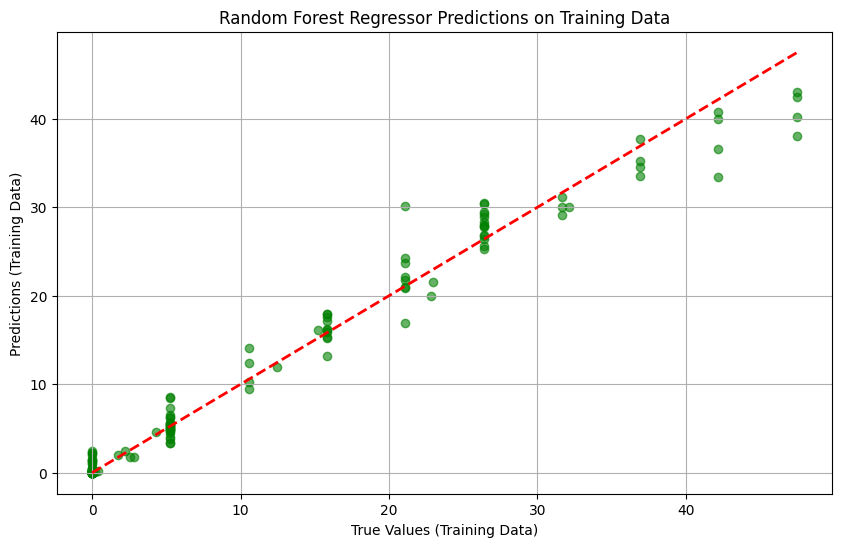

In [31]:
# Predictions on training data
rf_train_predictions = rf_model.predict(X_train)

# Plot predictions on training data
plt.figure(figsize=(10, 6))
plt.scatter(y_train, rf_train_predictions, color='green', alpha=0.6)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2)
plt.xlabel('True Values (Training Data)')
plt.ylabel('Predictions (Training Data)')
plt.title('Random Forest Regressor Predictions on Training Data')
plt.grid(True)
plt.show()


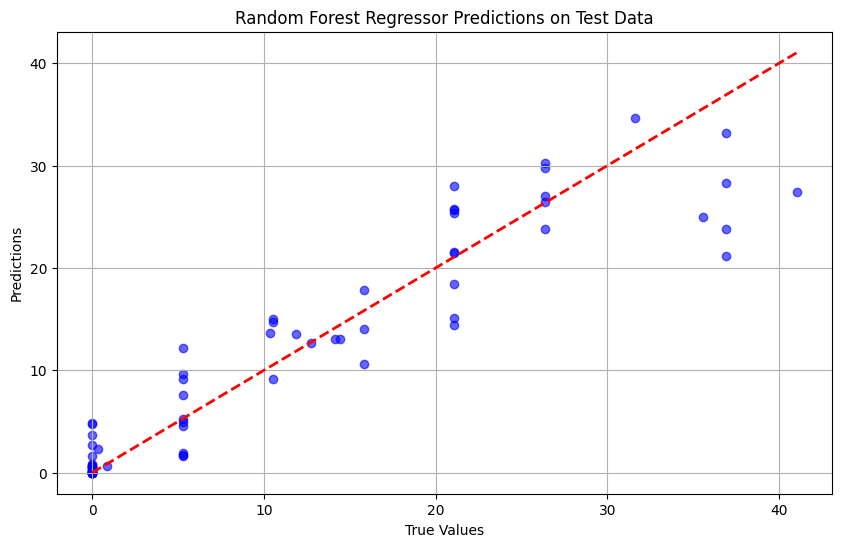

In [32]:
# Plot predictions on test data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_test_predictions, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest Regressor Predictions on Test Data')
plt.grid(True)
plt.show()


In [37]:
import joblib
import pandas as pd

def load_model_and_predict(new_data):
    # Load the model
    rf_model = joblib.load('random_forest_regressor_model.pkl')

    # Create a DataFrame from new data
    new_data_df = pd.DataFrame(new_data)
    
    # Ensure the columns are in the same order as during training
    new_data_df = new_data_df[['PS', 'T2M', 'RH2M', 'WD2M', 'WS2M']]

    # Make predictions
    predictions = rf_model.predict(new_data_df)
    
    # Return predictions rounded to 3 decimal places
    return [round(pred, 3) for pred in predictions]

# Example usage with new data extended to include 'GWETTOP'
new_test_data = {
    'PS': [99.28, 98.97, 98.94, 99.29, 99.10, 98.80, 99.05],
    'T2M': [27.68, 25.78, 28.22, 26.53, 29.00, 22.00, 30.00],
    'RH2M': [57.12, 91.31, 77.19, 64.0, 60.0, 85.0, 50.0],
    'WD2M': [293.5, 271.56, 274.38, 311.37, 280.0, 250.0, 290.0],
    'WS2M': [1.79, 3.02, 2.49, 1.66, 2.00, 3.50, 1.00],
}

predictions = load_model_and_predict(new_test_data)
print("Predictions:", predictions)

# Classify the monthly rainfall
def classify_rainfall(predictions):
    categories = []
    for rainfall in predictions:
        if rainfall == 0:
            categories.append("No Rain")
        elif 0 < rainfall < 0.5:
            categories.append("Slight Rain")
        elif 0.5 <= rainfall < 4.0:
            categories.append("Moderate Rain")
        elif 4.0 <= rainfall < 8.0:
            categories.append("Heavy Rain")
        else:
            categories.append("Very Heavy Rain")
    return categories

rainfall_categories = classify_rainfall(predictions)
print("Rainfall Categories:", rainfall_categories)


Predictions: [0.0, 33.227, 13.149, 0.0, 0.091, 34.129, 1.271]
Rainfall Categories: ['No Rain', 'Very Heavy Rain', 'Very Heavy Rain', 'No Rain', 'Slight Rain', 'Very Heavy Rain', 'Moderate Rain']
